In [ ]:
#we import the libraries we need
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#create a dataframe from the file
df = pd.read_csv(r"C:\Users\Eduardo\Desktop\Here-Hackaton\data\POIs\POI_4815075.csv")


In [ ]:
#view the dataset
print(df.head())

   Unnamed: 0     LINK_ID      POI_ID  SEQ_NUM  FAC_TYPE             POI_NAME  \
0         244  1296526969  1244439551        1      4013        TOLUCA CENTRO   
1       85076   702722866  1244248545        1      9535           MISCELÁNEA   
2      104077   702722866  1178939983        1      9535  TIENDA DE ABARROTES   
3         151  1296526966  1244944824        1      4013        TOLUCA CENTRO   
4      151721   939199332  1178940592        1      7538                NIETO   

  POI_LANGCD POI_NMTYPE  POI_ST_NUM  ST_NUM_FUL  ...  AIRPT_TYPE ENTR_TYPE  \
0        SPA          B         NaN         NaN  ...         NaN       NaN   
1        SPA          B       144.0         NaN  ...         NaN       NaN   
2        SPA          B         NaN         NaN  ...         NaN       NaN   
3        SPA          B         NaN         NaN  ...         NaN       NaN   
4        SPA          B         NaN         NaN  ...         NaN       NaN   

  REST_TYPE FOOD_TYPE  ALT_FOOD REG_FOOD  RS

In [ ]:
#clean the dataset

data_new = df.drop(
    columns=[
        'POI_LANGCD', 'POI_NMTYPE', 'ST_NUM_FUL', 'ST_NFUL_LC', 'ST_LANGCD', 'ACC_TYPE', 'PH_NUMBER',
        'NAT_IMPORT', 'PRIVATE', 'IN_VICIN', 'VANCITY_ID', 'ACT_LANGCDAIRPT_TYPE', 'ENTR_TYPE',
        'REST_TYPE', 'FOOD_TYPE', 'ALT_FOOD', 'REG_FOOD', 'RSTR_TYPE', 'OPEN_24', 'DIESEL', 'BLD_TYPE','LINK_ID','POI_ID',
        'FAC_TYPE','SEQ_NUM','Unnamed: 0'

    ],
    errors='ignore'  
)

In [ ]:
#view the dataset
data_new

,POI_NAME,POI_ST_NUM,ST_NAME,POI_ST_SD,CHAIN_ID,NUM_PARENT,NUM_CHILD,PERCFRREF,ACT_ADDR,ACT_LANGCD,ACT_ST_NAM,ACT_ST_NUM,ACT_ADMIN,ACT_POSTAL,AIRPT_TYPE
0,TOLUCA CENTRO,NaN,AVENIDA SOLIDARIDAD LAS TORRES,R,0,0,0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MISCELÁNEA,144.0,CALLE GLORIA,L,0,0,0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TIENDA DE ABARROTES,NaN,CALLE GLORIA,L,0,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TOLUCA CENTRO,NaN,AVENIDA SOLIDARIDAD LAS TORRES,R,0,0,0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NIETO,NaN,AVENIDA SOLIDARIDAD LAS TORRES,L,0,0,0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7227,ZONA INDUSTRIAL EL CERRILLO,NaN,AVENIDA ISIDRO FABELA,L,0,0,0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7228,ESC PRIM JAIME TORRES BODET,NaN,CALLE PASEOS DEL JAZMÍN,R,0,0,0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7229,CERRILLO,NaN,AUTOPISTA TOLUCA-NAUCALPAN,L,0,0,0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7230,CERRILLO,NaN,AUTOPISTA TOLUCA-NAUCALPAN,R,0,0,0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#IMPORT THE NECESSARY LIBRARIES
from sklearn.cluster import KMeans
import pandas as pd

# DROP 'geometry' and 'link_id' columns for clustering
X = data_new.drop(columns=['geometry', 'link_id'])

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_new['cluster'] = kmeans.fit_predict(X_encoded)

In [68]:
print(data_new[['cluster']].head())

   cluster
0        0
1        0
2        0
3        0
4        0


In [ ]:
#cargamos el shapefile
print(data_new['cluster'].value_counts())



cluster
0    6492
1     531
2     209
Name: count, dtype: int64


In [70]:
# Si quieres ver todo el DataFrame con los clusters
print(data_new.head())

              POI_NAME  POI_ST_NUM                         ST_NAME POI_ST_SD  \
0        TOLUCA CENTRO         NaN  AVENIDA SOLIDARIDAD LAS TORRES         R   
1           MISCELÁNEA       144.0                    CALLE GLORIA         L   
2  TIENDA DE ABARROTES         NaN                    CALLE GLORIA         L   
3        TOLUCA CENTRO         NaN  AVENIDA SOLIDARIDAD LAS TORRES         R   
4                NIETO         NaN  AVENIDA SOLIDARIDAD LAS TORRES         L   

   CHAIN_ID  NUM_PARENT  NUM_CHILD  PERCFRREF ACT_ADDR ACT_LANGCD ACT_ST_NAM  \
0         0           0          0       10.0      NaN        NaN        NaN   
1         0           0          0       25.0      NaN        NaN        NaN   
2         0           0          0       32.0      NaN        NaN        NaN   
3         0           0          0       50.0      NaN        NaN        NaN   
4         0           0          0       84.0      NaN        NaN        NaN   

  ACT_ST_NUM ACT_ADMIN  ACT_POSTAL  AI

In [71]:
print(X.head())

              POI_NAME  POI_ST_NUM                         ST_NAME POI_ST_SD  \
0        TOLUCA CENTRO         0.0  AVENIDA SOLIDARIDAD LAS TORRES         R   
1           MISCELÁNEA       144.0                    CALLE GLORIA         L   
2  TIENDA DE ABARROTES         0.0                    CALLE GLORIA         L   
3        TOLUCA CENTRO         0.0  AVENIDA SOLIDARIDAD LAS TORRES         R   
4                NIETO         0.0  AVENIDA SOLIDARIDAD LAS TORRES         L   

   CHAIN_ID  NUM_PARENT  NUM_CHILD  PERCFRREF ACT_ADDR ACT_LANGCD ACT_ST_NAM  \
0         0           0          0       10.0        0          0          0   
1         0           0          0       25.0        0          0          0   
2         0           0          0       32.0        0          0          0   
3         0           0          0       50.0        0          0          0   
4         0           0          0       84.0        0          0          0   

  ACT_ST_NUM ACT_ADMIN  ACT_POSTAL  AI

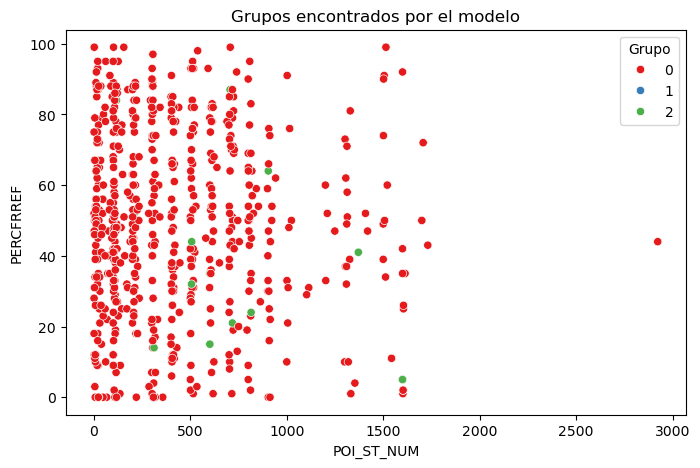

In [72]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data_new, x='POI_ST_NUM', y='PERCFRREF', hue='cluster', palette='Set1')
plt.title('Grupos encontrados por el modelo')
plt.xlabel('POI_ST_NUM')
plt.ylabel('PERCFRREF')
plt.legend(title='Grupo')
plt.show()